In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as mpl
%matplotlib notebook

torch.manual_seed(0)  # doesnt work???

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()  # call nn.Module constructor
        self.conv1 = nn.Conv2d(1, 6, 3)  # 1 input channel, 6 out channels, 3x3 kernel
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Convs
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, (2,2))
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, (2,2))
        
        # FCs
        x = x.view(-1, self.num_flat_features(x))
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


In [3]:
net = Net()
print(net)

input = torch.randn(1, 1, 32, 32)
target = torch.randn(10).view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()  # evaluation criteria

output = net(input)
loss = criterion(output, target)
loss.backward()  # backprop

print('Loss:', loss.data)
print('C1:', net.conv1.bias.grad)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
Loss: tensor(1.0354)
C1: tensor([-0.0076, -0.0104, -0.0119, -0.0051,  0.0101, -0.0034])


tensor([[0.9855, 0.9749, 1.1114, 1.0487, 0.9630, 1.1778, 0.9080, 0.9380, 0.9078,
         0.8910]])


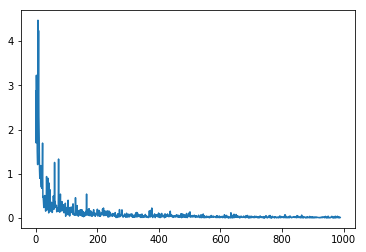

In [4]:
net = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_history = list()

# training loop
for i in range(1000):
    # zero the gradient buffers
    optimizer.zero_grad()
    # iteration
    input = torch.randn(1, 1, 32, 32) * 200  # random input value
    target = torch.ones(10).view(1,-1)  # solution is always ones
    output = net(input)
    loss = criterion(output, target)
    # update
    loss.backward()  # creates the gradients
    optimizer.step()  # updates the weights and bias
    loss_history.append(loss)  # save value

input = torch.randn(1,1,32,32) * 200
print(net(input).data)
mpl.plot(loss_history[10:])